Days
1    21.5
2    20.0
3    22.5
4    25.0
5    20.0
Name: Values, dtype: float64


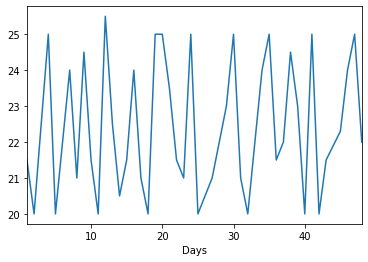

In [58]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

 

 
series = read_csv('Downloads/ARMA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

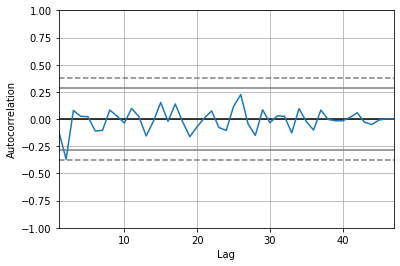

In [59]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

c:\users\zubair\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Values   No. Observations:                   47
Model:                     ARMA(1, 0)   Log Likelihood                 -94.186
Method:                       css-mle   S.D. of innovations              1.795
Date:                Sat, 19 Oct 2019   AIC                            194.371
Time:                        14:08:36   BIC                            199.922
Sample:                             0   HQIC                           196.460
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.3922      0.236     95.077      0.000      21.931      22.854
ar.L1.Values    -0.1141      0.144     -0.794      0.432      -0.396       0.168
                                    Roots   

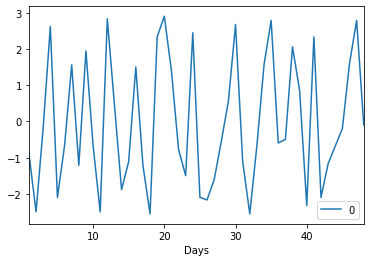

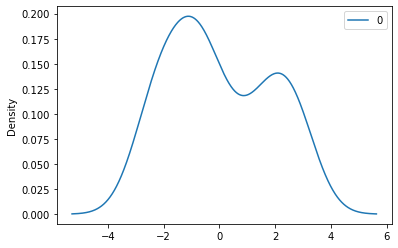

               0
count  47.000000
mean   -0.002166
std     1.814222
min    -2.551010
25%    -1.351330
50%    -0.551010
75%     1.580208
max     2.905402


In [60]:
model = ARIMA(series, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [61]:
from sklearn.metrics import mean_squared_error
X = series.values
#print(X)
size = int(len(X) * 0.75)
size

35

[21.16489683]
predicted=21.164897, expected=21.500000
[21.16084844]
predicted=21.160848, expected=22.000000
[22.75286051]
predicted=22.752861, expected=24.500000
[22.25071961]
predicted=22.250720, expected=23.000000
[21.30854078]
predicted=21.308541, expected=20.000000
[22.34244691]
predicted=22.342447, expected=25.000000
[23.09518749]
predicted=23.095187, expected=20.000000
[21.73373673]
predicted=21.733737, expected=21.500000
[23.56103435]
predicted=23.561034, expected=22.300000
[22.67744419]
predicted=22.677444, expected=24.000000
[22.0131876]
predicted=22.013188, expected=25.000000
[21.24515952]
predicted=21.245160, expected=22.000000
[21.5 22.  24.5 23.  20.  25.  20.  21.5 22.3 24.  25.  22. ]
Test MSE: 2.973
Mape : 0.058


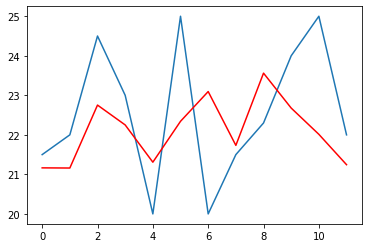

In [68]:
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
mape=0
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    print(yhat)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    mape+=abs((obs-yhat)/obs)
    #error = mean_squared_error(test, predictions)
print(test)
print('Test MSE: %.3f' % error)
# plot
mape=float(mape)/13
print("Mape : %.3f" % mape)
print(pyplot.plot(test))
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
RMSE=(error)**0.5
RMSE